In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

#### Let's load the Nashville zipcode data and look at the first few rows
- geopandas reads files with the `read_file()` method
- The zipcode data was downloaded from https://data.nashville.gov/General-Government/Zip-Codes/u7r5-bpku


In [2]:
hoods = gpd.read_file('../data/Neighborhood Association Boundaries (GIS).geojson')
print(hoods.crs)
hoods.head( )

epsg:4326


,name,geometry
0,Historic Buena Vista,"MULTIPOLYGON (((-86.79511 36.17576, -86.79403 ..."
1,Charlotte Park,"MULTIPOLYGON (((-86.87460 36.15758, -86.87317 ..."
2,Hillwood,"MULTIPOLYGON (((-86.87614 36.13554, -86.87583 ..."
3,East Hill,"MULTIPOLYGON (((-86.74659 36.20376, -86.74559 ..."
4,Cleveland Park,"MULTIPOLYGON (((-86.75606 36.18857, -86.75600 ..."


#### Note that _if_ the crs contains init it needs to be [updated](https://geopandas.org/projections.html) as shown in the cell below

In [3]:
# zipcodes.geometry.to_crs('EPSG:4326')
# print(zipcodes.crs)
hoods.shape

(288, 2)

#### Now let's look at the difference between calling the first geometry variable.....


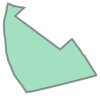

In [4]:
hoods.loc[0, 'geometry']

#### ...and printing it


In [5]:
print(hoods.loc[0, 'geometry'])

MULTIPOLYGON (((-86.79511056795417 36.17575964963348, -86.79403325521203 36.17672381962277, -86.79395847673587 36.17673420120556, -86.79373059621346 36.17641850227536, -86.79345684770965 36.1760073285478, -86.7933653702227 36.17592609720739, -86.79294909679425 36.17527664780614, -86.79276591717007 36.17511962002857, -86.79252941560033 36.17471240878589, -86.79204396927803 36.17393170332863, -86.79167790414918 36.17334940652481, -86.7916936044697 36.17329298843413, -86.79203101691085 36.1731861114189, -86.79474163086816 36.17249213438422, -86.79601903802255 36.17218267273473, -86.79764416397879 36.17179978743778, -86.79830164245051 36.17168336043859, -86.79879977448026 36.17243166386886, -86.79924036890505 36.1729960002125, -86.79949254372757 36.1733962443001, -86.79962585216791 36.17371402180879, -86.79978177579596 36.17412395085653, -86.8000340272343 36.17467828643516, -86.80014485213776 36.17518521060327, -86.80021778306909 36.17542866685226, -86.80031177458922 36.17668510380093, -86

#### Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() function


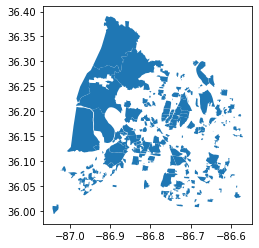

In [6]:
hoods.plot();

#### Add information and styling 
- set the `column =` to a column in the GeoDataFrame to color by
- change the [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) 
- pass in keywords to tweak the legend created by `matplotib`

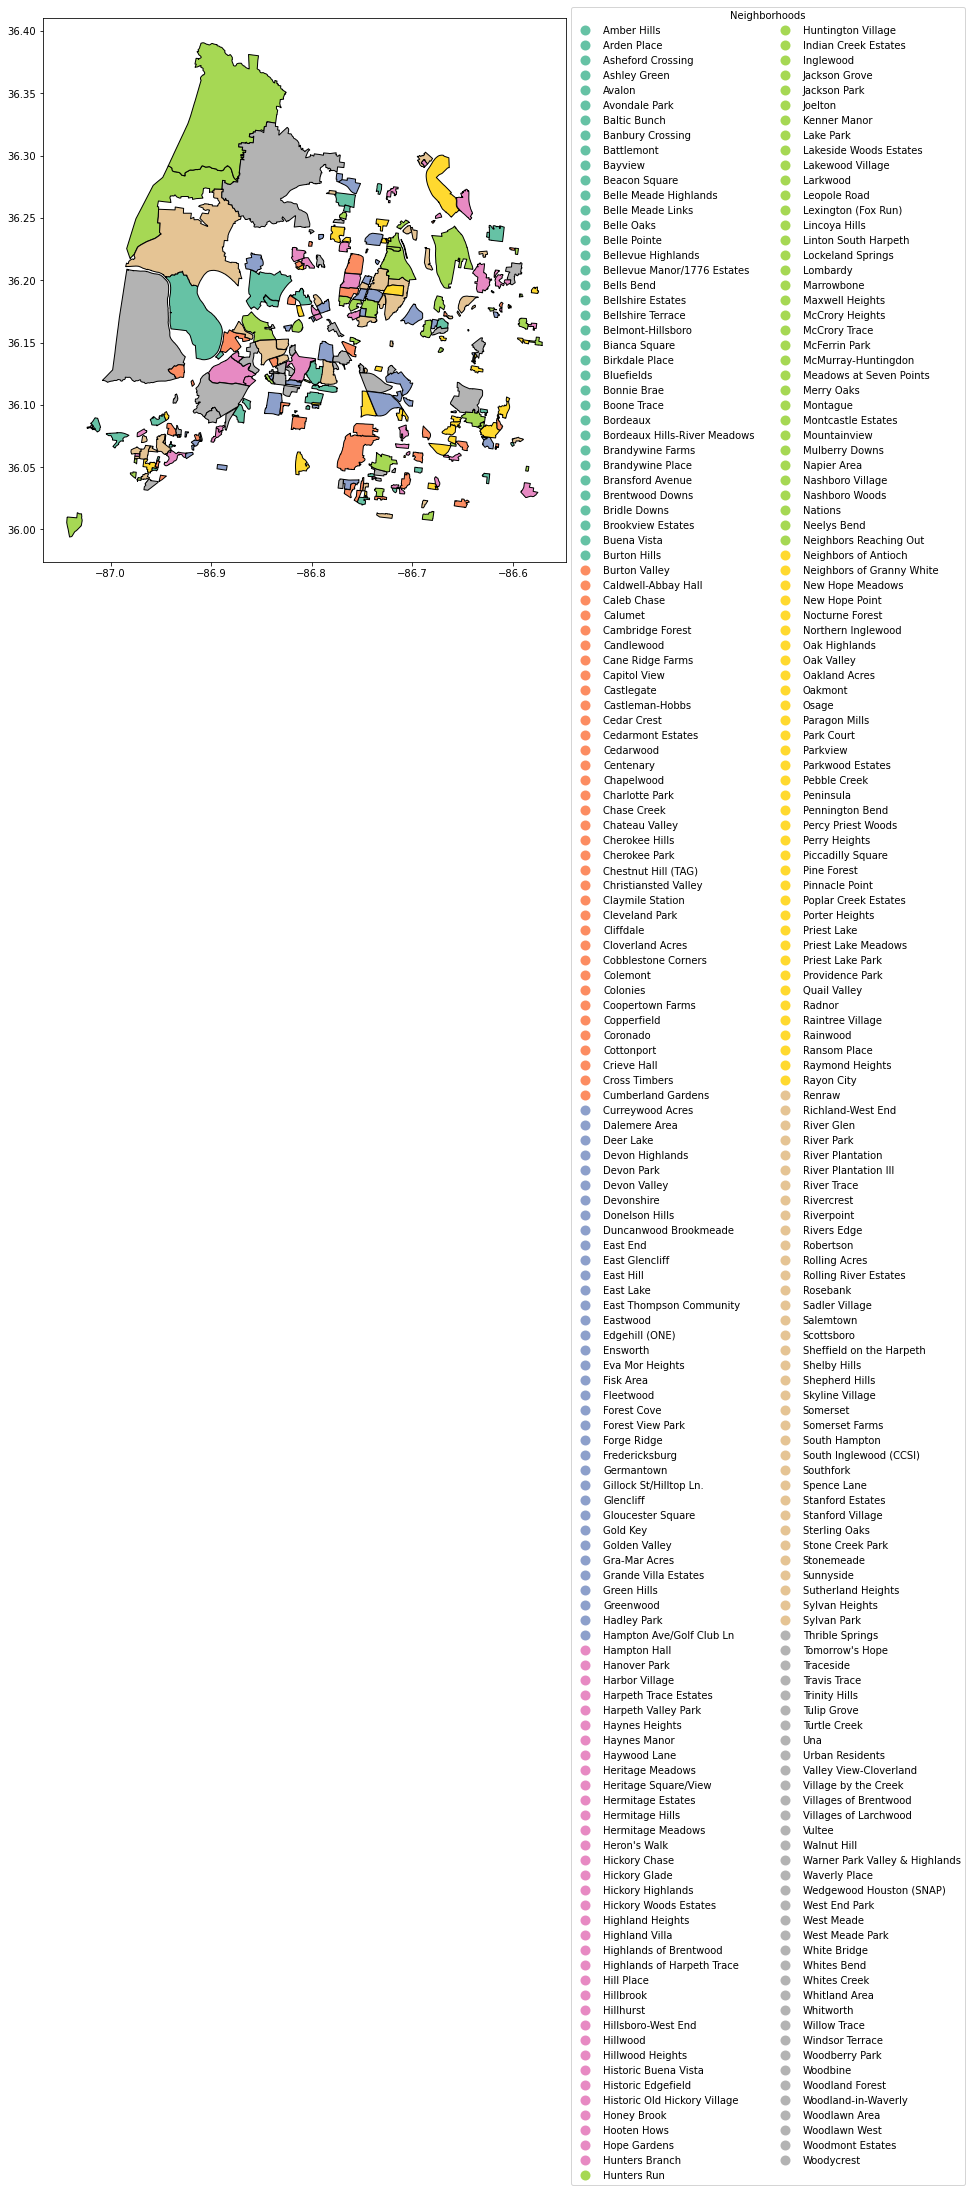

In [7]:
#geopandas handles legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Neighborhoods', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

hoods.plot(column = 'name', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

Read in Historical Markers csv

In [8]:
hist_mark = pd.read_csv('../data/Historical_Markers.csv')
print(hist_mark.shape)
hist_mark.head(3)

(220, 8)


,number,year_erect,marker_name,marker_text,address,lat,lng,location
0,94,1995.0,Votes for Women,"On August 18, 1920, Tennessee became the 36th ...",Union Street and Capitol Boulevard,36.164158,-86.782348,POINT (-86.782348 36.164158)
1,82,1982.0,Oglesby Community House,"Built 1898, the Mary Lee Academy, the second s...",5724 Edmondson Pike,36.037807,-86.743326,POINT (-86.743326 36.037807)
2,68,1976.0,Edmondson Home Site,"Will Edmondson, born about 1883 of former slav...","Fourteenth Avenue South, north of Wade Avenue",36.137383,-86.790549,POINT (-86.790549 36.137383)


In [9]:
hist_mark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   number       220 non-null    int64  
 1   year_erect   215 non-null    float64
 2   marker_name  220 non-null    object 
 3   marker_text  220 non-null    object 
 4   address      218 non-null    object 
 5   lat          216 non-null    float64
 6   lng          216 non-null    float64
 7   location     216 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 13.9+ KB


In [10]:
hist_mark['geometry'] = hist_mark.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
hist_mark.head(3)

,number,year_erect,marker_name,marker_text,address,lat,lng,location,geometry
0,94,1995.0,Votes for Women,"On August 18, 1920, Tennessee became the 36th ...",Union Street and Capitol Boulevard,36.164158,-86.782348,POINT (-86.782348 36.164158),POINT (-86.782348 36.164158)
1,82,1982.0,Oglesby Community House,"Built 1898, the Mary Lee Academy, the second s...",5724 Edmondson Pike,36.037807,-86.743326,POINT (-86.743326 36.037807),POINT (-86.743326 36.037807)
2,68,1976.0,Edmondson Home Site,"Will Edmondson, born about 1883 of former slav...","Fourteenth Avenue South, north of Wade Avenue",36.137383,-86.790549,POINT (-86.790549 36.137383),POINT (-86.790549 36.137383)


In [11]:
del hist_mark['location']

In [12]:
hoods.crs

hist_mark.head(3)

,number,year_erect,marker_name,marker_text,address,lat,lng,geometry
0,94,1995.0,Votes for Women,"On August 18, 1920, Tennessee became the 36th ...",Union Street and Capitol Boulevard,36.164158,-86.782348,POINT (-86.782348 36.164158)
1,82,1982.0,Oglesby Community House,"Built 1898, the Mary Lee Academy, the second s...",5724 Edmondson Pike,36.037807,-86.743326,POINT (-86.743326 36.037807)
2,68,1976.0,Edmondson Home Site,"Will Edmondson, born about 1883 of former slav...","Fourteenth Avenue South, north of Wade Avenue",36.137383,-86.790549,POINT (-86.790549 36.137383)


#### The `GeoDataFrame()` constructor needs 3 parameters:
 - a DataFrame
 - a coordinate reference system
 - a geometry

In [13]:
hist_geo = gpd.GeoDataFrame(hist_mark, 
                           crs = hoods.crs, 
                           geometry = hist_mark['geometry'])

In [14]:
type(hist_geo)

geopandas.geodataframe.GeoDataFrame

In [13]:
#hoods = hoods[['zip', 'po_name', 'geometry']]

Join the neighborhood association boundaries (GIS) with the Historical Markers csv

In [15]:
hist_hoods = gpd.sjoin(hist_geo, hoods, op = 'within')

In [16]:
hist_hoods.shape

(74, 10)

In [17]:
hist_hoods.rename(columns={'name' : 'neighborhood'}, inplace=True)

In [18]:
hist_hoods.head()

,number,year_erect,marker_name,marker_text,address,lat,lng,geometry,index_right,neighborhood
2,68,1976.0,Edmondson Home Site,"Will Edmondson, born about 1883 of former slav...","Fourteenth Avenue South, north of Wade Avenue",36.137383,-86.790549,POINT (-86.79055 36.13738),215,Edgehill (ONE)
162,50,1971.0,Eighth Avenue South Reservoir,This 51 Mil. Gal. Reservoir was built 1887-89 ...,"8th Avenue South entrance to reservoir, wall m...",36.138980,-86.779139,POINT (-86.77914 36.13898),215,Edgehill (ONE)
177,203,2019.0,Rev. Bill Barnes (1931-2017),"Reverend William L. 'Bill' Barnes, a pastor, c...",1502 Edgehill Avenue,36.143243,-86.790861,POINT (-86.79086 36.14324),215,Edgehill (ONE)
9,148,2013.0,Cohn School,Designed by architects Asmus and Clark and ope...,"Cohn School, 4805 Park Avenue, (Sylvan Park)",36.150993,-86.845250,POINT (-86.84525 36.15099),24,Sylvan Park
69,151,2013.0,Richland Park,"Once a part of the Byrd Douglas plantation, th...","4711 Charlotte Avenue, in front of Richland Pa...",36.152004,-86.844134,POINT (-86.84413 36.15200),24,Sylvan Park


In [19]:
hist_hoods['neighborhood'].value_counts()

Urban Residents                 9
Germantown                      5
Sylvan Park                     5
Lockeland Springs               4
Edgehill (ONE)                  3
Nations                         3
Hillsboro-West End              3
Eastwood                        2
Historic Old Hickory Village    2
Chestnut Hill (TAG)             2
Green Hills                     2
Richland-West End               2
Scottsboro                      2
Wedgewood Houston (SNAP)        2
Belmont-Hillsboro               2
Centenary                       2
Burton Valley                   1
Salemtown                       1
Highland Heights                1
Buena Vista                     1
Joelton                         1
Belle Meade Links               1
Neighbors of Antioch            1
Woodmont Estates                1
Kenner Manor                    1
Radnor                          1
South Inglewood (CCSI)          1
Nashboro Village                1
Una                             1
Inglewood     

Which neighborhoods in Nashville are named after historical markers around the city?

In [20]:
named_after = hist_hoods[hist_hoods.apply(lambda x: x.neighborhood in x.marker_name, axis=1)]
named_after.shape

(10, 10)

In [21]:
named_after.head(10)

,number,year_erect,marker_name,marker_text,address,lat,lng,geometry,index_right,neighborhood
129,150,2013.0,Sylvan Park School,A two-room frame school building was construct...,"Sylvan Park School, 4801 Utah Avenue",36.144462,-86.844438,POINT (-86.84444 36.14446),24,Sylvan Park
21,183,2018.0,Kenner Manor Historic District,"Originally part of the Woodlawn estate, this p...",Kenner Ave. at Woodmont Cir.,36.119153,-86.840325,POINT (-86.84033 36.11915),68,Kenner Manor
33,136,2009.0,Scottsboro,"In 1869, Tom Scott opened a general store 500 ...",Old Hickory Blvd at Ashland City Highway,36.211694,-86.920493,POINT (-86.92049 36.21169),175,Scottsboro
39,127,2008.0,Una Community,The Una community developed around the crossro...,Smith Springs Road and Old Murfreesboro Road,36.096776,-86.654516,POINT (-86.65452 36.09678),179,Una
59,179,2018.0,Germantown Brewery District,Germantown was home to many 19th-cen. European...,1200 5th Ave N,36.175239,-86.787948,POINT (-86.78795 36.17524),210,Germantown
128,178,2018.0,Centenary United Methodist Church,Rev. William Gower built the first Gower's Cha...,6809 Gower Road,36.126892,-86.932021,POINT (-86.93202 36.12689),169,Centenary
149,205,2019.0,Crieve Hall,The Crieve Hall neighborhood was part of the o...,498 Hogan Road,36.065264,-86.757741,POINT (-86.75774 36.06526),110,Crieve Hall
192,104,1999.0,Woodmont Estates,Created in 1937 from the G. A. Puryear farm. I...,West Valley Brook and Bear Road,36.114255,-86.823867,POINT (-86.82387 36.11425),235,Woodmont Estates
211,97,1996.0,Radnor College,"Two blocks west, on the hill, stood Radnor, a ...",Corner of Nolensville Road and McClellan Street,36.101345,-86.740546,POINT (-86.74055 36.10135),222,Radnor
216,118,2004.0,Sunnyside,"Home of Mary Benton, widow of Jesse Benton who...",Sevier Park 3000 Granny White Pike,36.119859,-86.790745,POINT (-86.79075 36.11986),220,Sunnyside


Filter neighborhoods dataframe for only these hoods

In [22]:
polygon_named_after = hoods.loc[hoods.name.isin(('Sylvan Park', 'Kenner Manor', 'Scottsboro', 'Una', 'Germantown', 'Centenary', 'Crieve Hall', 'Woodmont Estates', 'Radnor', 'Sunnyside'))]
polygon_named_after.shape

(10, 2)

In [23]:
polygon_named_after.head()

,name,geometry
24,Sylvan Park,"MULTIPOLYGON (((-86.83557 36.15231, -86.83545 ..."
68,Kenner Manor,"MULTIPOLYGON (((-86.83661 36.11758, -86.83674 ..."
110,Crieve Hall,"MULTIPOLYGON (((-86.77452 36.05227, -86.77449 ..."
169,Centenary,"MULTIPOLYGON (((-86.92747 36.13122, -86.92726 ..."
175,Scottsboro,"MULTIPOLYGON (((-86.90329 36.24368, -86.90543 ..."


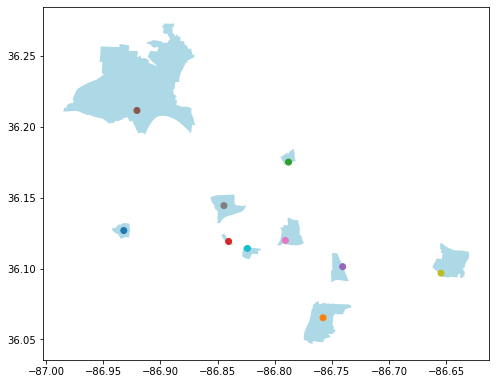

In [24]:
ax = polygon_named_after.plot(figsize = (8, 10), color = 'lightblue')
named_after.plot( ax = ax, column = 'neighborhood')
plt.show();

In [25]:
polygon_named_after.geometry.centroid

<ipython-input-25-9d725968e147>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon_named_after.geometry.centroid


24     POINT (-86.84267 36.14404)
68     POINT (-86.84205 36.12048)
110    POINT (-86.75804 36.06272)
169    POINT (-86.93306 36.12695)
175    POINT (-86.92007 36.22956)
179    POINT (-86.64547 36.10428)
210    POINT (-86.78766 36.17843)
220    POINT (-86.78554 36.12459)
222    POINT (-86.74484 36.09931)
235    POINT (-86.82196 36.11162)
dtype: geometry

In [26]:
#find the center of the larger (more southern) polygon and look at it
center = polygon_named_after.geometry.centroid[235]
print(center)

POINT (-86.82195746285116 36.11162382641025)


<ipython-input-26-66fc8fb9abdb>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon_named_after.geometry.centroid[235]


#### Folium requires a location point as an array 
- with *latitude* first
- but shapely Points have *longitude* first 

In [27]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.11162382641025, -86.82195746285116]


#### To create a folium map just call the folium `Map()` constructor
- `location` is the only argument required by the constructor
    - Set `area_center` as the `location` of the folium map. 
- `zoom_start` is an optional argument 
    - A setting of 12 should get us nice and close

In [28]:
#create our map of Nashville Zip Code 37207 and show it
map_named_after = folium.Map(location =  area_center, zoom_start = 12)
map_named_after

In [29]:
#draw our zip code area: 37207
map_named_after = folium.Map(location =  area_center, zoom_start = 10)

folium.GeoJson(polygon_named_after).add_to(map_named_after)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in named_after.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop1 = str(row_values['marker_name'])
    pop2 = str(row_values['neighborhood'])
    icon=folium.Icon(color="blue",icon="history", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = (pop1, pop2), icon = icon) 

    marker.add_to(map_named_after)
map_named_after.save('../maps/map_named_after.html')

#display our map
map_named_after